# Sistemi preporuke

Donošenje odluka nije lako. Zato se ljudi uvek oslanjaju na preporuke dobijene od strane prijatelja, od ljudi koji su već napravili takvu odluku, ili od ekperata. Internet je učinio donosenje odluka još težim zbog ogromne količine proizvoda i usluga dostupnih na e-commerce i slicnim sajtovima i vestima o popustima i rasprodajama svakoga dana. Zbog ovoga ljudi su preplavljeni informacijama i velikim izborom. Ovaj problem rešavaju sve prisutniji (i korisćeniji) sistemi preporuka.

Sistemi preporuka (eng. recommender systems, recommendation systems) obuhvataju klasu tehnika i algoritama filtriranja podataka koji korisnicima predlažu „relevantne“ proizvode - u opštem slučaju stavke. Stavka je opšti termin koji se koristi za označavanje onoga što sistem preporučuje korisnicima. Pružajući im personalizovani, ekskluzivni sadržaj koji se odnosi na različite procese donošenja odluka, kao na primer koje predmete treba kupiti, koju muziku slušati ili koje vesti čitati, sistemi preporuka rešavaju problem preopterećenja informacijama (eng. information overload) sa kojima se korisnici neprestano susreću. Jedan od primera u kome je sistem preporuke značajno doprineo jeste knjiga o planinarenju "Touching the void" koja je postala veoma popularna 9 godina nakon što je publikovana. Naime, nakon toliko godina ova knjiga je bila preporučena na Amazonu zajedno sa sličnom knjigom "Into thin air" koja je nacionalni best seler.

Sistemi preporuka su od velike važnosti za uspeh e-trgovine i IT industrije u današnje vreme. Oni igraju važnu ulogu kod veb sajtova kao što su Amazon, YouTube, Netflix, Yahoo, Tripadvisor, Last.fm, IMDb, Google news, Pandora  i drugi. Takođe, mnoge kompanije sada razvijaju i raspoređuju (eng. developing and deploying) sisteme preporuka kao deo servisa koji oni pružaju njihovim preplatnicima. Na primer Netflix, online servis za gledanje filmova, je nagradio tim koji je prvi uspeo da unapredi performanse njihovog sistema preporuka nagradom od milion dolara.

Razvijeni su različiti pristupi za izgradnju sistema preporuka koji mogu da koriste:
* uzajamno filtriranje (eng. collaborative filtering, CF)
* filtriranje zasnovano na grupisanju (eng. content based filtering)
* hibridno filtriranje

U ovom projektu biće izgrađen sistem preporuka zasnovan na pristupima uzajamnog filtriranja... koristeći skup/skupove podataka.... Ostatak ovog rada (seminarskog) je organizovan na sledeći način:....

# Algoritmi uzajamnog filtriranja zasnovani na susedstvu

Algoritmi uzajamnog filtriranja zasnovani na susedstvu (eng. KNN collaborative filtering algorithm) su algoritmi uzajamnog filtriranja kombinovani sa KNN algoritmom, uz pomoc kojeg biraju susede. Zasnivaju se na činjenici da slični korisnici pokazuju slične obrasce ponašanja prilikom ocenjivanja i da slični predmeti dobijaju slične ocene. Naime, ideja je da će korisnici koji su imali slično ponašanje u prošlosti (pravili slične izbore), verovatno imati slično ponašanje (praviti slične izbore) i u budućnosti. Postoje dve primarne vrste ovog algoritama:

* Korisnički zasnovano uzajamno filtriranje (eng. user-based collaborative filtering): U ovom slučaju se ocene, koje pružaju korisnici slični ciljnom korisniku A, koriste za davanje (generisanje) preporuka za A. Predviđene ocene za korisnika A izračunavaju se kao prosečne vrednosti (sa tezinama) ovih ocena sličnih korisnika za svaku stavku.

* Uzajamno filtriranje zasnovano na stavkama (eng. item-based collaborative filtering): Da bi se napravile preporuke za ciljnu stavku B, prvi korak je odrediti skup stavki S, koji su najsličniji stavci B. Zatim, da bi se predvideo rejting bilo kog određenog korisnika A za stavku B, određuju se ocene u skupu S, koje su određene od strane korisnika A. Prosek (sa tezinama) ovih ocena koristi se za izračunavanje predviđene ocene korisnika A za stavku B.

Problem koji može nastati pri koriscenju uzajamnog filtriranja zasnovanog na korisnicima je ukoliko se u jednom periodu nekom korisniku svidjaju odredjene stavke, a u narednom periodu neke potpuno drugacije, pa poređenje jednog korisnika sa drugim korisnikom koje je zasnovano na prošlosti (prošlom ponašanju) postaje prilično komplikovano. S druge strane, stavka je uvek stavka, ne menja se tokom vremena. Takođe, uglavnom postoji manje stavki nego korisnika, pa se može uštedeti na resursima potrebim za izračunavanje.

Na narednoj slici dat je grafički prikaz uzajamnog filtriranja zasnovanog na korisnicima (slika 1, levo) i na stavkama (slika 2, desno). Na slici 1 prikazano je da ukoliko korisnik A voli stavke 1, 3 i 4, i korisnik C voli stavke 3 i 4, može se zaključiti da su preference korisnika A i korisnika C veoma slične. S obzirom da korisnik A (za razliku od korisnika C) voli još i film 1, ovaj film može biti preporučen i korisniku C. Slično je i kada se radi sa stavkama, na slici 2.

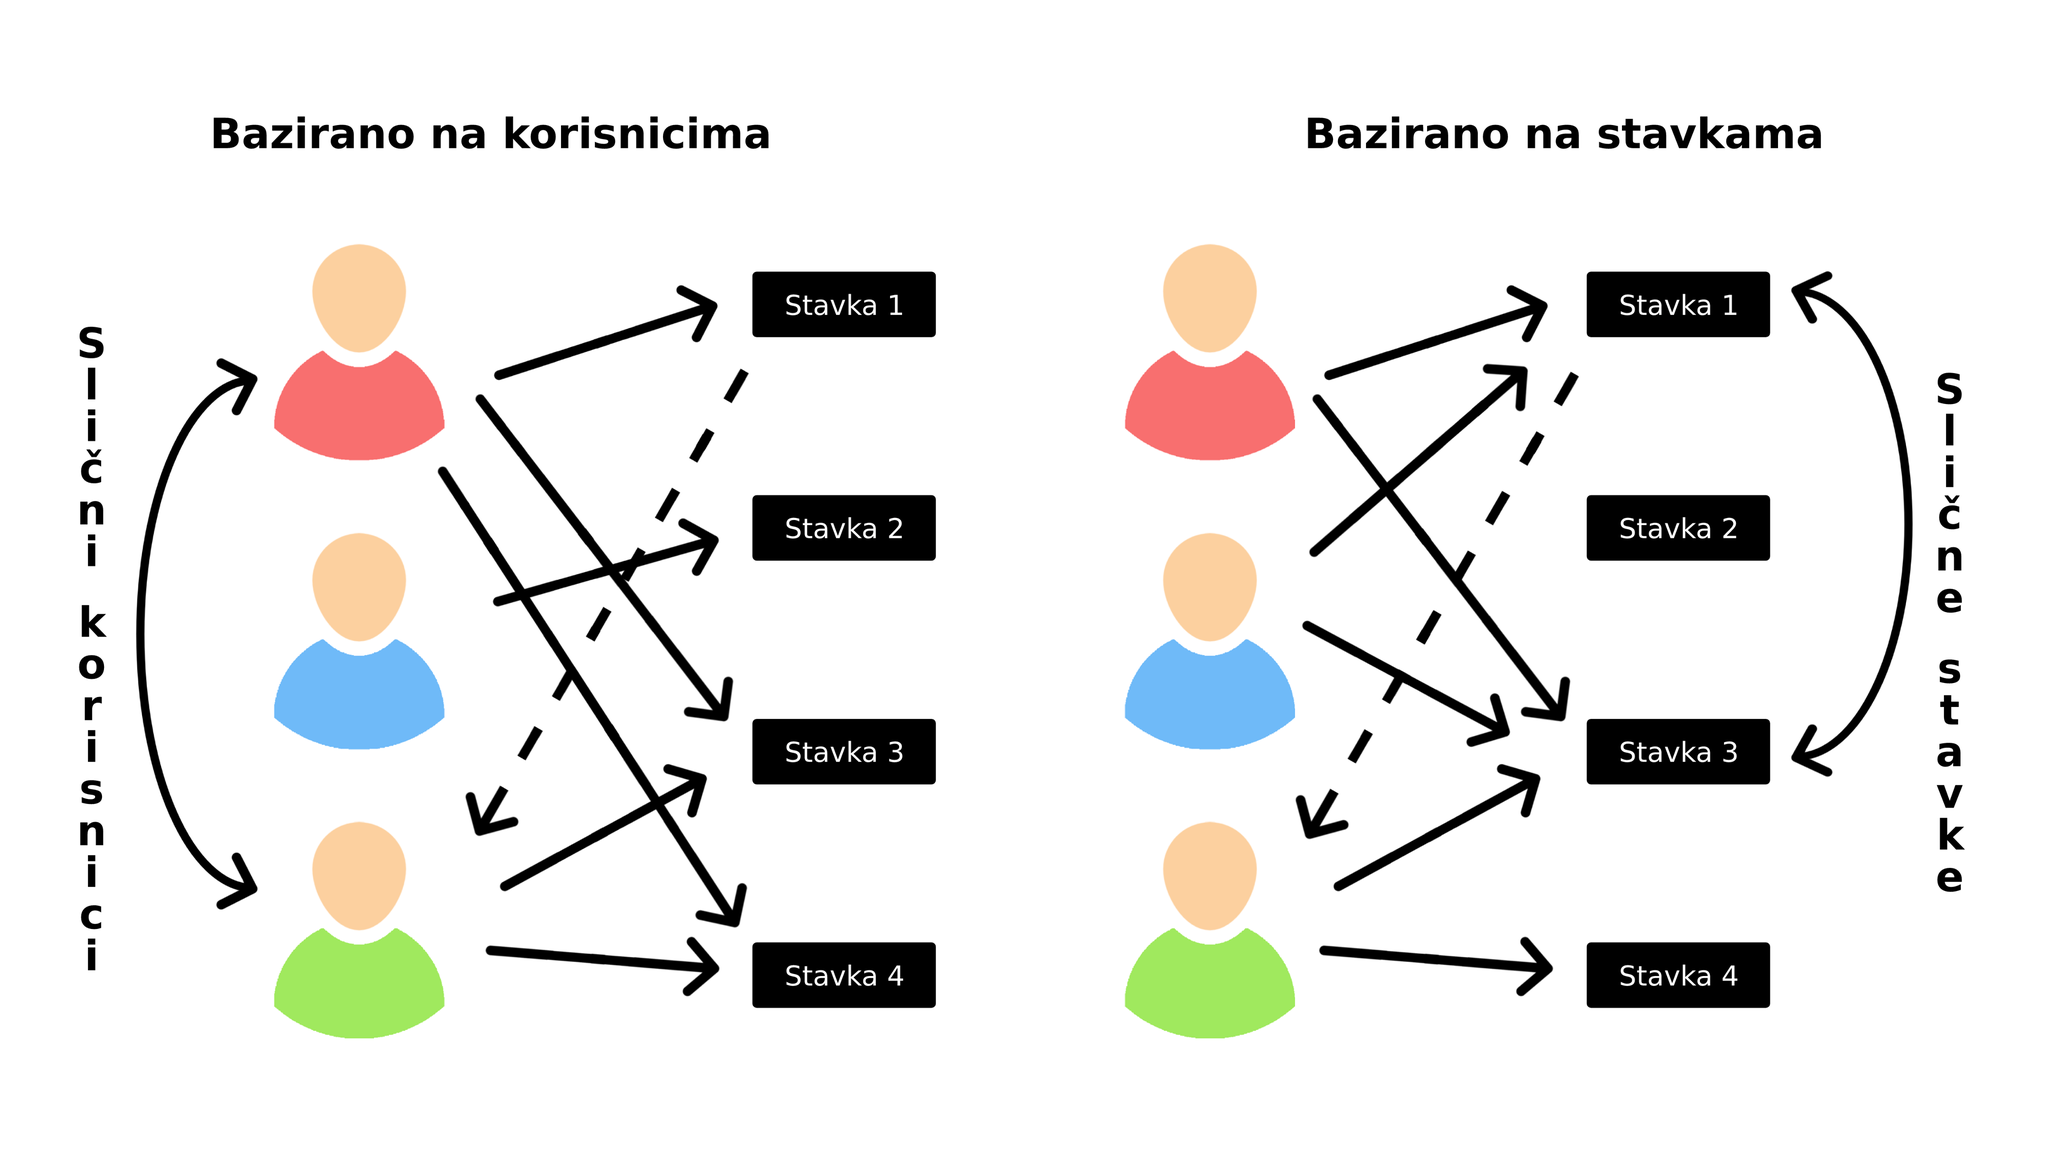

## Uzajamno filtriranje zasnovano na korisnicima

Osnovna ideja algoritma, kao što je već pomenuto, bazirana je na istoriji korisnika. Potrebno je pronaći korisnika u' koji je sused korisnika u i koji ima slična interesovanja kao ciljni korisnik u, a zatim korisniku u preporuciti stavke koje su se dopale korisniku u', i predvideti rezultat/skor koji bi ciljni korisnik u mogao da da stavci dobijenoj izračunavanjem rezultata/skora susednog korisnika u' na stavci.

Algoritam uzajamnog filtriranja se sastoji iz tri osnovna koraka:

1. izracunavanje slicnosti korisnika (eng. user similarity calculation)
2. odabir suseda (eng. nearest neighbor selection)
3. predvidjanje rezultata/skora (eng. prediction score calculation)

Osnovni koraci algoritma uzajamnog filtriranja zasnovanog na susedstvu su:

1. izracunavanje slicnosti korisnika (eng. user similarity calculation)
2. odabir suseda uz pomc algoritma KNN (eng. KNN nearest neighbor selection)
3. predvidjanje rezultata/skora (eng. predict score calculation)

### Računanje sličnosti

Sličnost između dva korisnka se izračunava koristeći ocene dodeljene stavkama od strane ta dva korisnika. Za svakog korisnika koristi se N dimenzionalni vektor za prikaz ocena stavke. Na primer, da bi se izračunala sličnost između korisnika U1 i korisnika U3, prvo treba pronaci skup filmova u kome su svi filmovi ocenjeni {M1, M2, M4, M5} kao i odgovarajuće ocene ovih filmova. Na primer, neka je vektor ocena korisnika U1 je {1,3,4,2}, dok je vektor ocena korisnika U3 {2,4,1,5}. Sličnost korisnika U1 i korisnika U3 se izračunava uz pomoc neke od formula sličnosti (eng. similarity formula). Ovo ilustruje naredna tabela.

| U/M | m1 | m2 | m3 | m4 | m5 |
| --- | --- | --- | --- | --- | --- |
| u1 | 1 | 3 | *3* | 4 | 2 |
| u2 | 3 | 1 | 4 |  |  |
| u3 | 2 | 4 |  | 1 | 5 |
| u4 | 2 |  | 2 |  |  |

Slicnost izmedju korisnika u i u' oznacava se kao sim(u, u'). Metodi koji se najcesce koriste za racunanje slicnosti korisnika su Cosine Similarity i Pearson Correlation similarity.

### Cosine similarity
Ovaj metod računa sličnost između dva korisnika tako što računa kosinus ugla između dva vektora. Cilj je kreirati matricu sličnosti korisnika - čije vrednosti predstavljaju kosinusnu sličnost između vektorskih reprezentacija korisnika. Vrednosti koje će ova matrica sadržati su iz intervala [0, 1].

Neka $\vec{X_i}$ i $\vec{Y_j}$ predstavljaju vektore ocena korisnika 𝑖  i 𝑗. Tada je element (𝑖,𝑗) matrice sličnosti jednak: (prepraviti umesto cos(X, Y) da bude cos(Xi, Yi)).

$$sim(x, y) = \cos \angle(\vec{X}, \vec{Y}) = \frac{\vec{X} \cdot \vec{Y}}{||\vec{X}|| \cdot ||\vec{Y}||} = \frac{\sum_{s \in s_{xy}}r_{x,s} \cdot r_{y,s}}{\sqrt{\sum_{s \in s_{xy}}(r_{x,s})^2} \cdot \sqrt{\sum_{s \in s_{xy}}(r_{y,s})^2}}$$

$r_{x,s}$ i $r_{y,s}$ su ocene za s (eng. the score of goods s) ocenjen od korisnika X i Y respektivno. $s_{xy}$ je skup stavki koje su korisnici x i y zajedno ocenili. Drugim recima, $S_{xy}$ = {${S \in Stavke | r_{x,s} \neq \epsilon \bigcap r_{y,s} \neq \epsilon }$}.

### Pearson correlation similarity
Ovo je mera linearne veze između dve promenljive. Naziva se još i prilagođeni kosinus (eng. adjusted cosine). Ova mera je značajna zbog toga što različiti korisnici imaju različite kriterijume za ocenjivanje. Na primer, neko daje samo visoke ocene, a neko je veoma strog pri ocenjivanju i daje uglavnom niske ocene. Ove razlike nisu primetne samo na individualnom nivou, već i na nivou različitih kultura - neke države su strože u ocenjivanju od drugih. Računanjem sličnosti uz pomoć ove metodu ove razlike se normalizuju. Umesto računanja sličnosti među korisnicima koje je zasnovano na njihovim "sirovim" vrednostima ocena, računa se sličnost uz pomoć razlika između ocena korisnika za neku stavku i prosečne ocene tog korisnika za sve stavke. Ovde se računa varijansa prosečne vrednosti ocena svakog korisnika, a ne "sirovih" ocena.

Ova mera je primenljiva i na stavke. U tom slucaju umesto racunanja razlike između ocena korisnika i prosečnih ocena korisnika, racuna se razlika između ocena korisnika i prosečnih ocena svih korisnika za datu stavku ($\overline{I}$).

Sledi formula po kojoj se ova mera izračunava, gde je $\overline{r_x}$ prosecna vrednost (eng. average score) vektora x.

### user based pearson similarity

$$sim(x,y) = \frac{\sum_{s \in s_{xy}}(r_{x,s}-\overline{r_x}) \cdot (r_{y,s}-\overline{r_y})}{\sqrt{\sum_{s \in s_{xy}}(r_{x,s}-\overline{r_x})^2} \cdot \sqrt{\sum_{s \in s_{xy}}(r_{y,s}-\overline{r_y})^2}}$$

Prethodna metoda daje dobre rezultate ukoliko skup podataka ne predstavlja retku matricu. U tom slučaju razlika između određene ocene i prosečne vrednosti ocena korisnika bila bi jednaka nuli. Dakle, metodu ima smisla koristiti samo ako je poznato da je većina korisnika ocenila veliki broj, odnosno većinu stavki.

### Mean squared difference

Ova mera koristi sve stavke koje su zajednicke za dva korisnika (skup zajednickih stavki). Srednje kvadratna razlika izmedju dva korisnika x i y racuna se prema formuli prikazanoj u nastavku. Iznad razlomacke crte je suma svih stavki koje su korisnik x i korisnik y ocenili - kvadrat razlike izmedju ocena korisnika. To je podeljeno ukupnim brojem stavki koje su zajednicke za ova dva korisnika x i y. Ovim se zapravo izracunava koliko su korisnici x i y razliciti. Da bi se izracunala slicnost, potrebno je uraditi inverz i dodati 1, kako bi se izbeglo deljenje nulom u slucaju da ova dva korisnika imaju identicne ocene (identicno ponasanje).

$$MSD(x, y) = \frac{\sum_{i \in I_{xy}}(x_i-y_i)^2}{|I_{xy}|}$$
$$MSDsim(x, y) = \frac{1}{MSD(x, y) + 1}$$

Ovo se sve moze preokrenuti tako da se primeni na stavke umesto na korisnike. Tako da x i y mogu da referisu na dve razlicite stavke umesto dva razlicita korisnika. Onda se gleda razlika ocena koje su zajednicke za obe stavke umesto stavki koje su zajednicke za korisnike.

### Jaccard similarity
Slicnost izmedju dva korisnika A i B racuna se kao velicina preseka izmedju ocena ova dva korisnika (ono sto je za njih zajednicko) podeljeno sa unijom ocena ova dva korisnika. Ovde vrednosti ocena nisu od znacaja. Ukoliko se radi sa implicitnim ocena, sama cinjenica da je neko nesto gledao ili kupio je od znacaja - nema konkretnih ocena, samo da li je neko izrazio intresovanje za neku stavku ili nije. U tom slucaju ova mera je razuman izbor jer je veoma brza za izracunavanje.

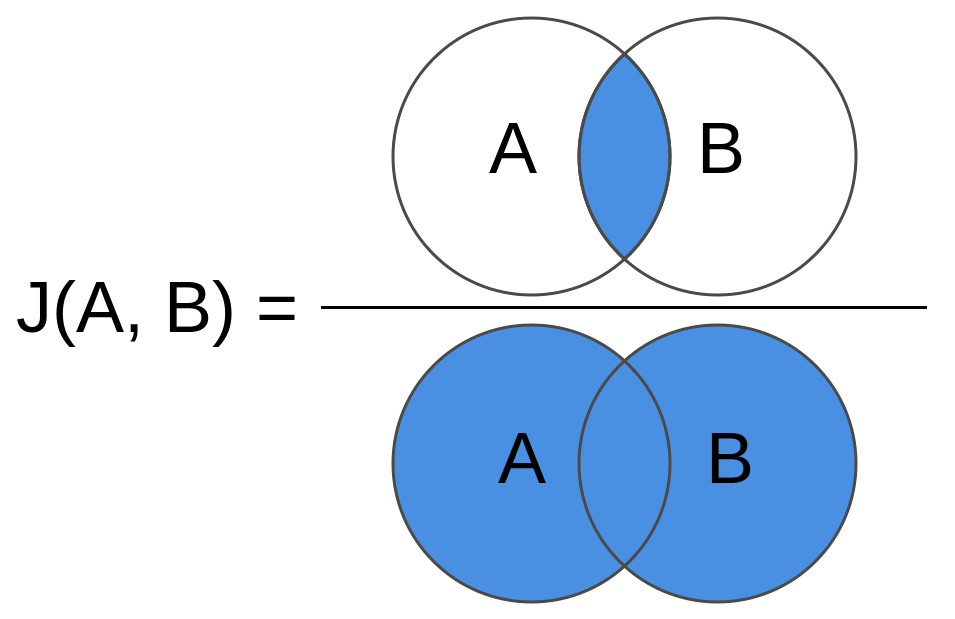

Nakon izračunavanja sličnosti između korisnika sim(u, u'), algoritam bira korisnike sa najvećom sličnošću sa korisnikom u'.

(slika)

### Izračunavanje predikcije skora (eng. predict score calculation)

Nakon određivanja suseda korisnika u', skor može biti predviđen prema skoru...
Formula za računanje je sledeća:...